# Test sur l'entièreté d'un département

In [1]:
%load_ext autoreload
%autoreload 2

import fonctions_utiles as fu
import gc 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
departements={"01":"Ain","02":"Aisne","03":"Allier","04":"Alpes-de-Haute-Provence","05":"Hautes-Alpes","06":"Alpes-Maritimes","07":"Ardèche","08":"Ardennes","09":"Ariège","10":"Aube","11":"Aude","12":"Aveyron","13":"Bouches-du-Rhône","14":"Calvados","15":"Cantal","16":"Charente","17":"Charente-Maritime","18":"Cher","19":"Corrèze","2A":"Corse-du-Sud","2B":"Haute-Corse","21":"Côte-d'Or","22":"Côtes-d'Armor","23":"Creuse","24":"Dordogne","25":"Doubs","26":"Drôme","27":"Eure","28":"Eure-et-Loir","29":"Finistère","30":"Gard","31":"Haute-Garonne","32":"Gers","33":"Gironde","34":"Hérault","35":"Ille-et-Vilaine","36":"Indre","37":"Indre-et-Loire","38":"Isère","39":"Jura","40":"Landes","41":"Loir-et-Cher","42":"Loire","43":"Haute-Loire","44":"Loire-Atlantique","45":"Loiret","46":"Lot","47":"Lot-et-Garonne","48":"Lozère","49":"Maine-et-Loire","50":"Manche","51":"Marne","52":"Haute-Marne","53":"Mayenne","54":"Meurthe-et-Moselle","55":"Meuse","56":"Morbihan","57":"Moselle","58":"Nièvre","59":"Nord","60":"Oise","61":"Orne","62":"Pas-de-Calais","63":"Puy-de-Dôme","64":"Pyrénées-Atlantiques","65":"Hautes-Pyrénées","66":"Pyrénées-Orientales","67":"Bas-Rhin","68":"Haut-Rhin","69":"Rhône","70":"Haute-Saône","71":"Saône-et-Loire","72":"Sarthe","73":"Savoie","74":"Haute-Savoie","75":"Paris","76":"Seine-Maritime","77":"Seine-et-Marne","78":"Yvelines","79":"Deux-Sèvres","80":"Somme","81":"Tarn","82":"Tarn-et-Garonne","83":"Var","84":"Vaucluse","85":"Vendée","86":"Vienne","87":"Haute-Vienne","88":"Vosges","89":"Yonne","90":"Territoire de Belfort","91":"Essonne","92":"Hauts-de-Seine","93":"Seine-Saint-Denis","94":"Val-de-Marne","95":"Val-d'Oise","971":"Guadeloupe","972":"Martinique","973":"Guyane","974":"La Réunion","976":"Mayotte"}


In [7]:
# On commence par récupérer le fichier départemental et renommer correctement les colonnes d'intérêt.

import pandas as pd 
from shapely import wkt

departement="63"
nom_departement=departements[departement]
print(f"Traitement du département {departement} - {nom_departement}")

buildings_file = f"/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/DHN_Potential_France_EFFINERSYS/data_basis/depart_{departement}/conso_coords_{departement}.csv"
roads_file = f"/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/DHN_Potential_France_EFFINERSYS/data_basis/depart_{departement}/final_routes_{departement}.csv"

reseaux_file="/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/DHN_Potential_France_EFFINERSYS/data_basis/reseaux_chaleur_reels.csv"



# Charger avec le séparateur correct
df_buildings= pd.read_csv(buildings_file, sep=',', dtype=str, on_bad_lines='skip', encoding='utf-8')


roads_df = pd.read_csv(roads_file, sep=',', dtype=str, on_bad_lines='skip', encoding='utf-8')

df_buildings_copie=df_buildings[["COM_INSEE", "CHAUF_MWH", "ECS_MWH", "geom_group"]].copy()
df_buildings_copie.rename(columns={"CHAUF_MWH": "conso_ref_chauf_MWh", "ECS_MWH": "conso_ref_ecs_MWh", "COM_INSEE": "code_commune_insee", "geom_group" : "geom_groupe"}, inplace=True)

df_buildings_copie["conso_ref_tot_MWh"] = df_buildings_copie["conso_ref_chauf_MWh"].astype(float) + df_buildings_copie["conso_ref_ecs_MWh"].astype(float)
# Filtrage global (une seule fois)
df_buildings_filtered = df_buildings_copie[
    df_buildings_copie["conso_ref_tot_MWh"].notna()
    & df_buildings_copie["geom_groupe"].notna()
]

# Groupement par commune
buildings_by_commune = {
    commune: df.reset_index(drop=True)
    for commune, df in df_buildings_filtered.groupby("code_commune_insee")
}

df_reseaux_reels=pd.read_csv(reseaux_file)

df_reseaux_reels_filtered=df_reseaux_reels[df_reseaux_reels["departemen"]==nom_departement]
print(f"Nombre de réseaux réels dans le département {nom_departement} : {len(df_reseaux_reels_filtered)}")

df_reseaux_reels_filtered["geometry"]=df_reseaux_reels_filtered["geom_group"].dropna().apply(wkt.loads)

longueur_totale = sum(geom.length for geom in df_reseaux_reels_filtered["geometry"] if geom is not None)

print(f"Longueur totale des réseaux réels dans le département {nom_departement} : {longueur_totale/1000:.2f} km.")


Traitement du département 63 - Puy-de-Dôme
Nombre de réseaux réels dans le département Puy-de-Dôme : 15
Longueur totale des réseaux réels dans le département Puy-de-Dôme : 135.08 km.


/var/folders/7q/1g8c6vbj47ndz60jzpr7xn7h0000gn/T/ipykernel_1399/1991184054.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reseaux_reels_filtered["geometry"]=df_reseaux_reels_filtered["geom_group"].dropna().apply(wkt.loads)


In [8]:
#On récupère ensuite la liste des communes.

liste_communes = df_buildings_filtered['code_commune_insee'].unique().tolist()
print(f"Ce département contient {len(liste_communes)} communes.")

#Trier les communes par ordre numérique
liste_communes = sorted(liste_communes, key=lambda x: int(x))
print(f"Liste des communes triées dans le département {departement} : {liste_communes}")

Ce département contient 464 communes.
Liste des communes triées dans le département 63 : ['63001', '63002', '63003', '63004', '63005', '63006', '63007', '63008', '63009', '63010', '63011', '63012', '63013', '63014', '63015', '63016', '63017', '63019', '63020', '63021', '63022', '63023', '63024', '63025', '63026', '63027', '63028', '63029', '63030', '63031', '63032', '63033', '63034', '63035', '63036', '63037', '63038', '63039', '63040', '63041', '63042', '63043', '63044', '63045', '63046', '63047', '63048', '63049', '63050', '63051', '63052', '63053', '63054', '63055', '63056', '63057', '63058', '63059', '63060', '63061', '63062', '63063', '63064', '63065', '63066', '63067', '63069', '63070', '63071', '63072', '63073', '63074', '63075', '63076', '63077', '63079', '63080', '63081', '63082', '63083', '63084', '63085', '63086', '63087', '63088', '63089', '63090', '63091', '63092', '63093', '63094', '63095', '63096', '63097', '63098', '63099', '63100', '63101', '63102', '63103', '63104', '

In [8]:
#Extraction des routes pour tout le département
df_selected_roads= fu.extraction_routes(roads_df)


In [9]:
NB_MIN=10 #nombre minimum de bâtiments dans le réseau
#XXX : à voir pour ce critère 


def process_commune(
    commune,
    df_selected_roads,
    idx_ip_plant=0
):
    """
    Traite une commune et retourne soit un dict de résultats, soit None si rejetée.
    """

    #Extraction bâtiments
    df_selected_buildings_interm = buildings_by_commune.get(commune, pd.DataFrame())
    if len(df_selected_buildings_interm) < NB_MIN:
        return None, len(df_selected_buildings_interm), "1", f"Stade 1 : {len(df_selected_buildings_interm)} bâtiments", 0


    # Projection / tri / cut
    df_selected_buildings = fu.transformer_coordonnees(df_selected_buildings_interm)
    df_buildings_sorted = fu.sort_and_cut_buildings_by_consumption(df_selected_buildings)

    if len(df_buildings_sorted) < NB_MIN:
        return None, len(df_buildings_sorted), "2", f"Stade 2 : {len(df_buildings_sorted)} bâtiments", 0


    #Sélection géométrique
    df_buildings_sorted_final, filtered_lines = fu.selection_geom_batiments_routes(
        df_buildings_sorted, df_selected_roads
    )

    #Création des objets
    liste_nodes_buildings = fu.create_liste_nodes_buildings(df_buildings_sorted_final)
    liste_roads = fu.create_roads(filtered_lines)

    road_intersections, liste_intersection_points = fu.intersection_points_and_roads(
        liste_roads, liste_nodes_buildings
    )

    road_intersections = fu.sort_road_intersections(
        road_intersections, liste_intersection_points, liste_roads
    )

    index_maps = fu.find_index_maps(road_intersections)
    voisins = fu.find_voisins(road_intersections, liste_intersection_points, index_maps)

    #Graphe
    G = fu.Graph(liste_nodes_buildings, road_intersections, liste_intersection_points, voisins, idx_ip_plant)
    G.dijkstra()
    #distances_buildings = G.distances_b_to_plant_sorted()
    connected, network_length, network_nodes, heat_demand = G.connected_buildings(verbose=False)

    if len(connected) < NB_MIN:
        return None, len(connected), "3", f"Stade 3 (réseau) : {len(connected)} bâtiments connectés et densité : {heat_demand/network_length:.2f}", len(liste_nodes_buildings)

    # --- Résultats ---
    print(f"Longueur totale du réseau : {network_length:.2f} m soit {network_length/1000:.2f} km.")
    print(f"Couverture chauffage totale : {heat_demand/1e3:.2f} GWh/an")

    
    result = {
        "graph": G,
        "connected_buildings": connected,
        "network_nodes": network_nodes,
        "filtered_lines": filtered_lines,
        "liste_nodes_buildings": liste_nodes_buildings,
        "network_length_km": network_length / 1000,
        "total_heating_coverage_MWh_per_year": heat_demand,
        "% heating_coverage": (
            heat_demand
            / df_buildings_sorted_final["conso_ref_tot_MWh"].sum()
        ) * 100,
    }

    return result, len(connected),"4", None, len(liste_nodes_buildings)


## Tentative sans optimisation de power plant


In [ ]:
selected = []
pourcentage_selected= []
rejected = []
rejected_3=[]
pourcentage_stade_3=[]

reseaux_communes = {}

for commune in liste_communes:
    result, nb_buildings_actuel, stade, reason, nb_total_buildings = process_commune(
        commune,
        df_selected_roads,
        idx_ip_plant=0

    )

    if result is None:
        rejected.append(commune)
        if stade == "3":
            rejected_3.append(commune)
            pourcentage_stade_3.append((nb_buildings_actuel/nb_total_buildings)*100)
        print(f"Commune {commune} rejetée ({reason})")
    else:
        selected.append(commune)
        reseaux_communes[commune] = result
        pourcentage_selected.append((nb_buildings_actuel/nb_total_buildings)*100)
        print(f"Commune {commune} éligible, le réseau comporte {len(result['connected_buildings'])} bâtiments.")

    # Nettoyage mémoire explicite
    gc.collect()


Commune 60001 rejetée (Stade 2 : 4 bâtiments)
Commune 60002 rejetée (Stade 2 : 2 bâtiments)
Commune 60003 rejetée (Stade 2 : 2 bâtiments)
Commune 60004 rejetée (Stade 2 : 3 bâtiments)
Commune 60005 rejetée (Stade 2 : 5 bâtiments)
Commune 60006 rejetée (Stade 2 : 8 bâtiments)
Longueur totale du réseau : 1691.17 m soit 1.69 km.
Couverture chauffage totale : 2.59 GWh/an
Commune 60007 éligible, le réseau comporte 15 bâtiments.
Commune 60008 rejetée (Stade 2 : 7 bâtiments)
Commune 60009 rejetée (Stade 3 (réseau) : 9 bâtiments connectés)
Commune 60010 rejetée (Stade 3 (réseau) : 1 bâtiments connectés)
Commune 60011 rejetée (Stade 2 : 2 bâtiments)
Commune 60012 rejetée (Stade 3 (réseau) : 1 bâtiments connectés)
Commune 60013 rejetée (Stade 2 : 7 bâtiments)
Commune 60014 rejetée (Stade 2 : 1 bâtiments)
Commune 60015 rejetée (Stade 2 : 5 bâtiments)
Commune 60016 rejetée (Stade 2 : 1 bâtiments)
Commune 60017 rejetée (Stade 2 : 7 bâtiments)
Commune 60019 rejetée (Stade 2 : 4 bâtiments)
Commune 60

In [12]:
#récupération des résultats finaux
print(f"Communes sélectionnées : {selected}")
print(f"Communes rejetées : {rejected}")
print(f"Nombre de communes sélectionnées : {len(selected)}")    



Communes sélectionnées : ['60007', '60057', '60103', '60104', '60106', '60107', '60139', '60141', '60143', '60155', '60156', '60157', '60159', '60172', '60175', '60176', '60223', '60254', '60282', '60286', '60325', '60338', '60346', '60360', '60382', '60409', '60414', '60432', '60446', '60463', '60471', '60500', '60509', '60524', '60537', '60581', '60584', '60589', '60590', '60612', '60636', '60639', '60665', '60667', '60670']
Communes rejetées : ['60001', '60002', '60003', '60004', '60005', '60006', '60008', '60009', '60010', '60011', '60012', '60013', '60014', '60015', '60016', '60017', '60019', '60020', '60021', '60022', '60023', '60024', '60025', '60026', '60027', '60028', '60029', '60030', '60031', '60032', '60033', '60034', '60035', '60036', '60037', '60039', '60040', '60041', '60042', '60043', '60044', '60045', '60046', '60047', '60048', '60049', '60050', '60051', '60052', '60053', '60054', '60055', '60056', '60058', '60059', '60060', '60061', '60062', '60063', '60064', '60065',

In [13]:
#Communes rejetées au stade 3 (nombre de bâtiments insuffisant dans le réseau)
print(f"Communes rejetées au stade 3 (nombre de bâtiments insuffisant dans le réseau) : {len(rejected_3)}")
print(f"Communes rejetées au stade 4 (densité insuffisante) : {len(rejected_4)}")

Communes rejetées au stade 3 (nombre de bâtiments insuffisant dans le réseau) : 84
Communes rejetées au stade 4 (densité insuffisante) : 0


## Tentative avec optimisation du power plant

In [ ]:
NB_MIN=10 #nombre minimum de bâtiments dans le réseau
#XXX : à voir pour ce critère 


def process_commune(
    commune,
    df_selected_roads,
    idx_ip_plant=0
):
    """
    Traite une commune et retourne soit un dict de résultats, soit None si rejetée.
    """

    #Extraction bâtiments
    df_selected_buildings_interm = buildings_by_commune.get(commune, pd.DataFrame())
    if len(df_selected_buildings_interm) < NB_MIN:
        return None, len(df_selected_buildings_interm), "1", f"Stade 1 : {len(df_selected_buildings_interm)} bâtiments", 0


    # Projection / tri / cut
    df_selected_buildings = fu.transformer_coordonnees(df_selected_buildings_interm)
    df_buildings_sorted = fu.sort_and_cut_buildings_by_consumption(df_selected_buildings)

    if len(df_buildings_sorted) < NB_MIN:
        return None, len(df_buildings_sorted), "2", f"Stade 2 : {len(df_buildings_sorted)} bâtiments", 0


    #Sélection géométrique
    df_buildings_sorted_final, filtered_lines = fu.selection_geom_batiments_routes(
        df_buildings_sorted, df_selected_roads
    )

    #Création des objets
    liste_nodes_buildings = fu.create_liste_nodes_buildings(df_buildings_sorted_final)
    liste_roads = fu.create_roads(filtered_lines)

    road_intersections, liste_intersection_points = fu.intersection_points_and_roads(
        liste_roads, liste_nodes_buildings
    )

    road_intersections = fu.sort_road_intersections(
        road_intersections, liste_intersection_points, liste_roads
    )

    index_maps = fu.find_index_maps(road_intersections)
    voisins = fu.find_voisins(road_intersections, liste_intersection_points, index_maps)

    #Graphe
    G = fu.Graph(liste_nodes_buildings, road_intersections, liste_intersection_points, voisins, idx_ip_plant)
    G.dijkstra()
    #distances_buildings = G.distances_b_to_plant_sorted()
    connected, network_length, network_nodes, heat_demand = G.connected_buildings(verbose=False)

    result = {
        "graph": G,
        "connected_buildings": connected,
        "network_nodes": network_nodes,
        "filtered_lines": filtered_lines,
        "liste_nodes_buildings": liste_nodes_buildings,
        "network_length_km": network_length / 1000,
        "total_heating_coverage_MWh_per_year": heat_demand,
        "% heating_coverage": (
            heat_demand
            / df_buildings_sorted_final["conso_ref_tot_MWh"].sum()
        ) * 100,
    }


    if len(connected) < NB_MIN:
        return result, len(connected), "3", f"Stade 3 (réseau) : {len(connected)} bâtiments connectés", len(liste_nodes_buildings)

    # --- Résultats ---
    print(f"Longueur totale du réseau : {network_length:.2f} m soit {network_length/1000:.2f} km.")
    print(f"Couverture chauffage totale : {heat_demand/1e3:.2f} GWh/an")
    if heat_demand/network_length < 1.5:  # MWh/m/an
        return result, len(connected),"4", f"Stade 4 (densité) : {heat_demand/network_length:.2f} MWh/m/an", len(liste_nodes_buildings)
    


    return result, len(connected),"5", None, len(liste_nodes_buildings)


In [28]:
process_cache = {}

def process_commune_cached(commune, df_selected_roads, idx_ip_plant):
    key = (commune, idx_ip_plant)
    if key not in process_cache:
        process_cache[key] = process_commune(
            commune,
            df_selected_roads,
            idx_ip_plant
        )
    return process_cache[key]


def retry_commune_with_idx(
    commune,
    df_selected_roads,
    max_idx_ip_plant=10,
    threshold_ratio=0.5,
    initial_idx_ip_plant=0
):
    """
    Tente de rendre une commune éligible en testant plusieurs idx_ip_plant.

    Returns
    -------
    success : bool
        True si la commune devient éligible
    result : dict or None
        Résultat du réseau si succès
    final_idx_ip_plant : int
        Valeur de idx_ip_plant ayant permis le succès
    stade : str
        Stade final
    reason : str
        Raison du rejet si échec
    """

    # Premier appel (idx_ip_plant initial)
    result, nb_actuel, stade, reason, nb_total = process_commune_cached(
        commune,
        df_selected_roads,
        idx_ip_plant=initial_idx_ip_plant
    )

    # Cas succès immédiat
    if stade == "5":
        return True, result, initial_idx_ip_plant, stade, reason

    # Cas où on ne retente pas
    ratio = nb_actuel / nb_total if nb_total else 0
    if not (stade == "3" and ratio <= threshold_ratio):
        return False, None, initial_idx_ip_plant, stade, reason

    # Tentatives avec d'autres idx_ip_plant
    for idx in range(1, max_idx_ip_plant):
        result, nb_actuel, stade, reason, nb_total = process_commune_cached(
            commune,
            df_selected_roads,
            idx_ip_plant=idx
        )

        if stade == "5":
            return True, result, idx, stade, reason

    # Échec après toutes les tentatives
    return False, None, idx, stade, reason


selected_bis = []
rejected_bis = []
reseaux_communes = {}

for commune in rejected_3:
    success, result, idx_ip_plant, stade, reason = retry_commune_with_idx(
        commune,
        df_selected_roads,
        max_idx_ip_plant=10,
        threshold_ratio=0.5
    )

    if success:
        print(
            f"Commune {commune} éligible avec idx_ip_plant={idx_ip_plant}, "
            f"le réseau comporte {len(result['connected_buildings'])} bâtiments."
        )
        selected_bis.append(commune)
        reseaux_communes[commune] = result
    else:
        print(
            f"Commune {commune} rejetée ({reason}) après toutes les tentatives."
        )
        rejected_bis.append(commune)

    gc.collect()


Longueur totale du réseau : 2290.12 m soit 2.29 km.
Couverture chauffage totale : 3.50 GWh/an
Commune 60009 éligible avec idx_ip_plant=1, le réseau comporte 11 bâtiments.
Commune 60010 rejetée (Stade 3 (réseau) : 1 bâtiments connectés) après toutes les tentatives.
Commune 60012 rejetée (Stade 3 (réseau) : 1 bâtiments connectés) après toutes les tentatives.
Commune 60025 rejetée (Stade 3 (réseau) : 1 bâtiments connectés) après toutes les tentatives.
Commune 60029 rejetée (Stade 3 (réseau) : 1 bâtiments connectés) après toutes les tentatives.
Commune 60041 rejetée (Stade 3 (réseau) : 2 bâtiments connectés) après toutes les tentatives.
Commune 60044 rejetée (Stade 3 (réseau) : 2 bâtiments connectés) après toutes les tentatives.
Commune 60047 rejetée (Stade 3 (réseau) : 1 bâtiments connectés) après toutes les tentatives.
Commune 60054 rejetée (Stade 3 (réseau) : 1 bâtiments connectés) après toutes les tentatives.
Commune 60063 rejetée (Stade 3 (réseau) : 1 bâtiments connectés) après toutes

KeyboardInterrupt: 

## Tracé des réseaux 

Longueur totale du réseau : 145170.09415392822 m ou via bis : 82604.1825931101 m
Couverture chauffage totale : 244111.0 MWh/an ou via bis : 244111.0 MWh/an


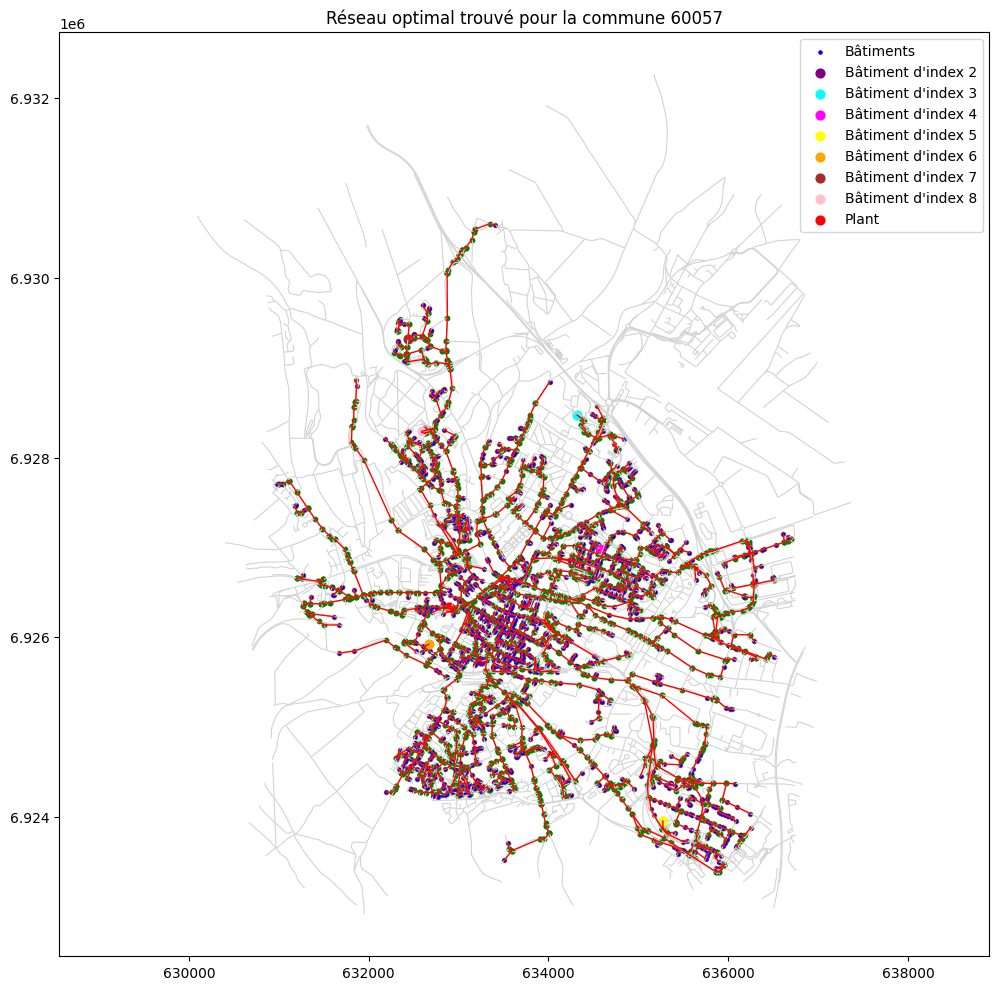

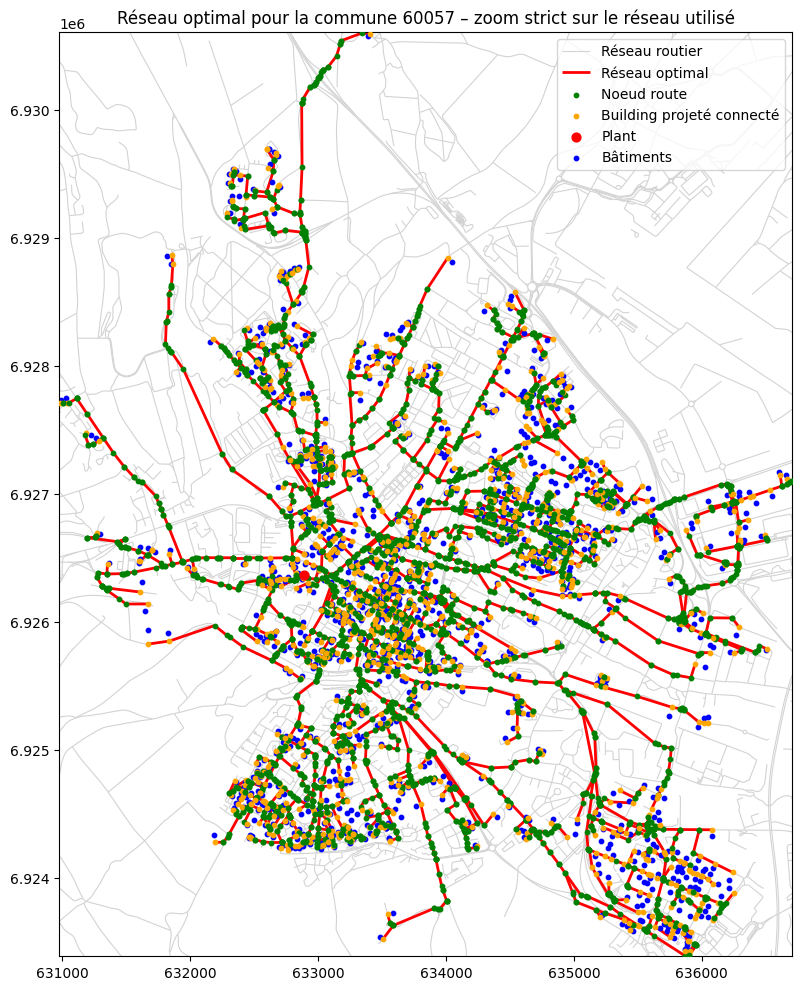

Longueur totale du réseau : 930.0368051316127 m ou via bis : 772.4097238268251 m
Couverture chauffage totale : 1424.0 MWh/an ou via bis : 1424.0 MWh/an


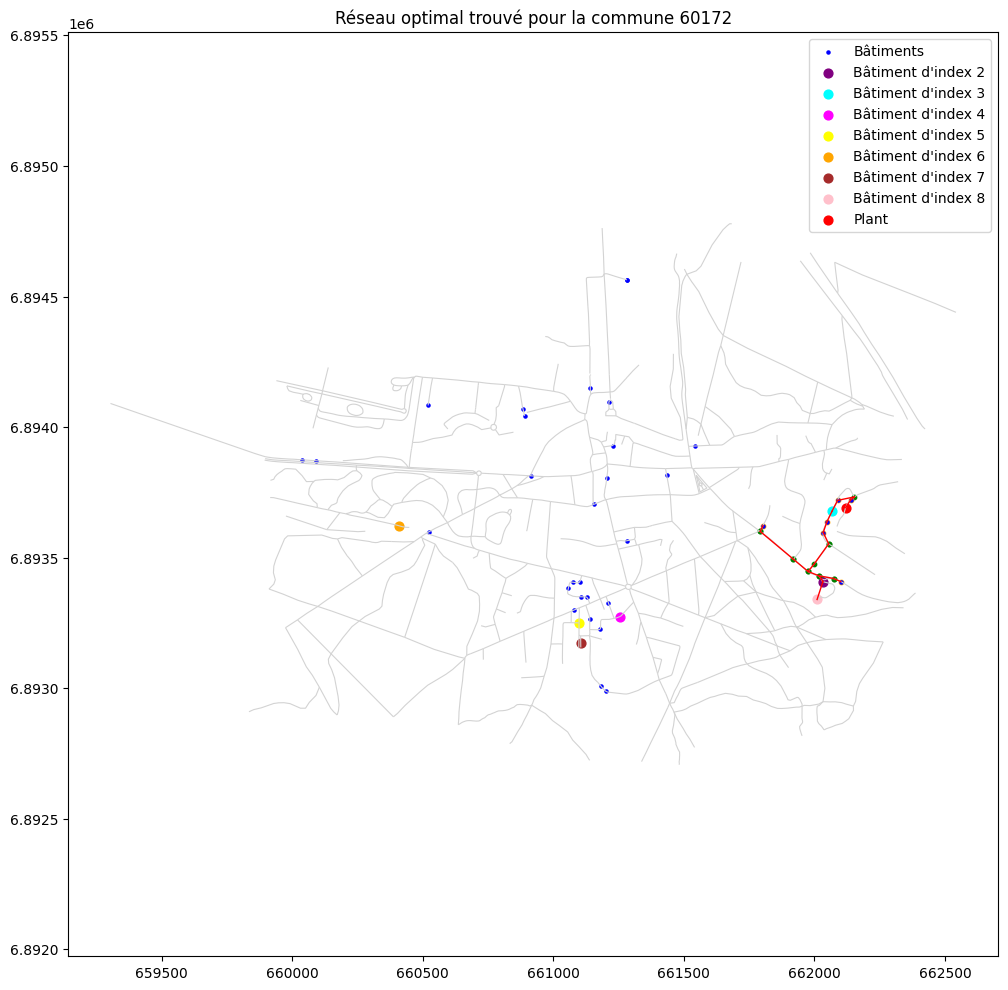

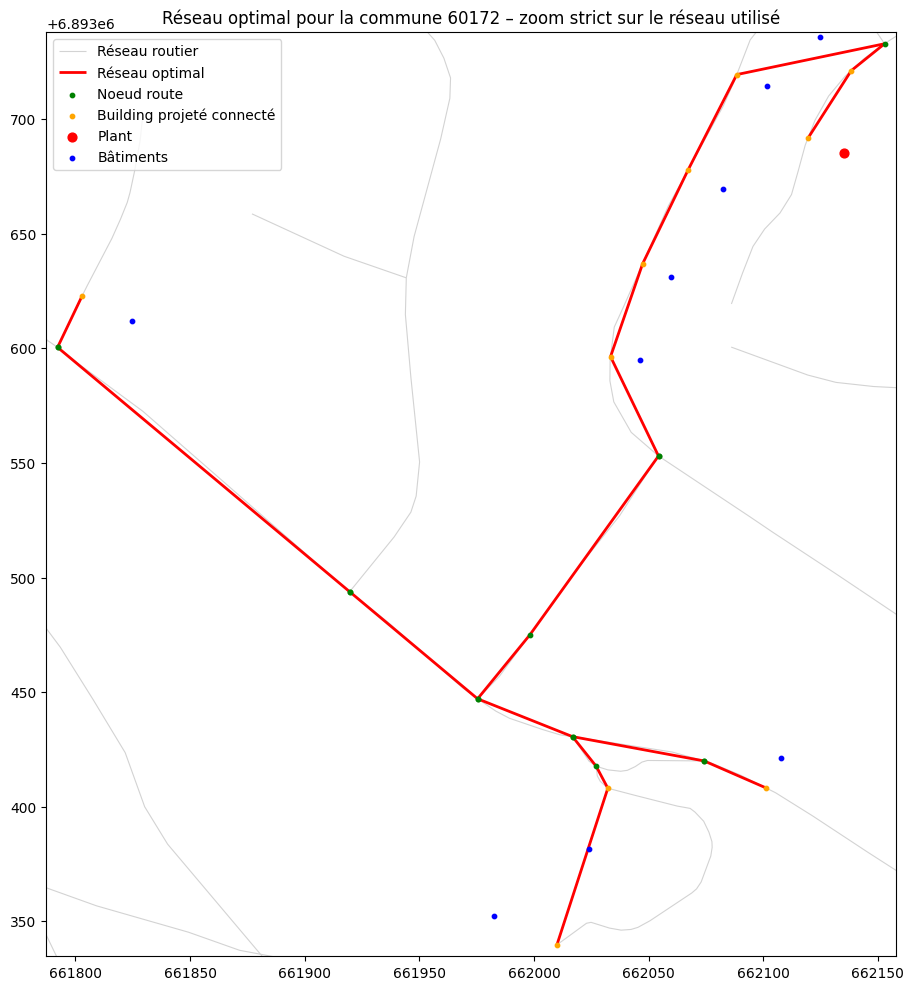

Longueur totale du réseau : 64717.58957070313 m ou via bis : 36708.06960195896 m
Couverture chauffage totale : 120479.0 MWh/an ou via bis : 120479.0 MWh/an


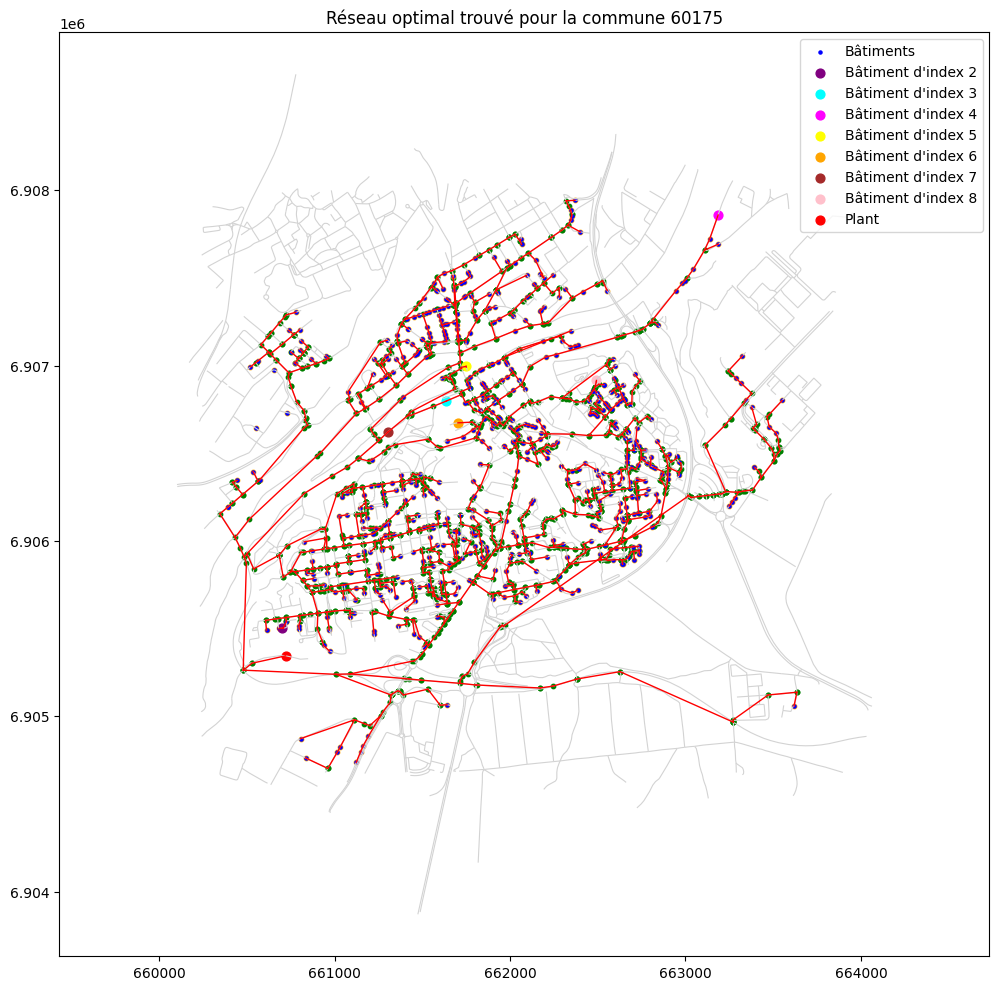

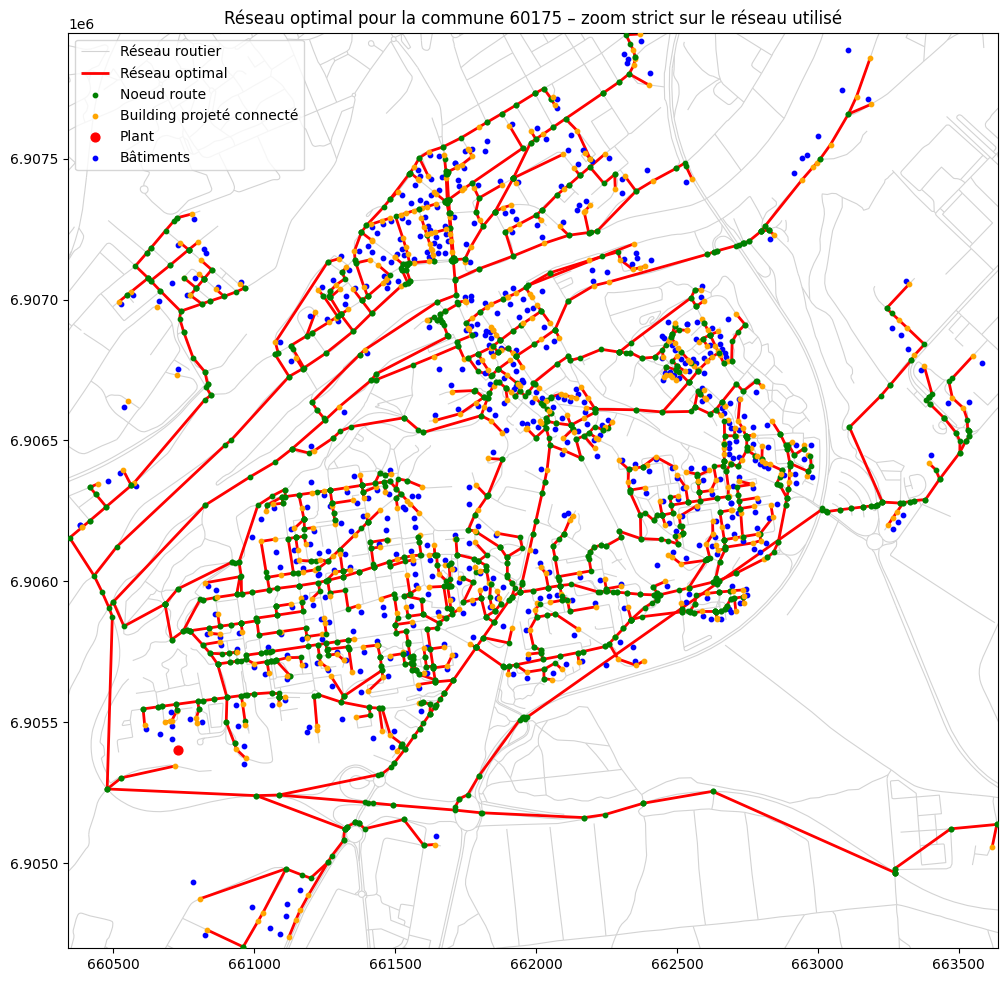

Longueur totale du réseau : 558.0665726646528 m ou via bis : 439.1493946067821 m
Couverture chauffage totale : 1501.0 MWh/an ou via bis : 1501.0 MWh/an


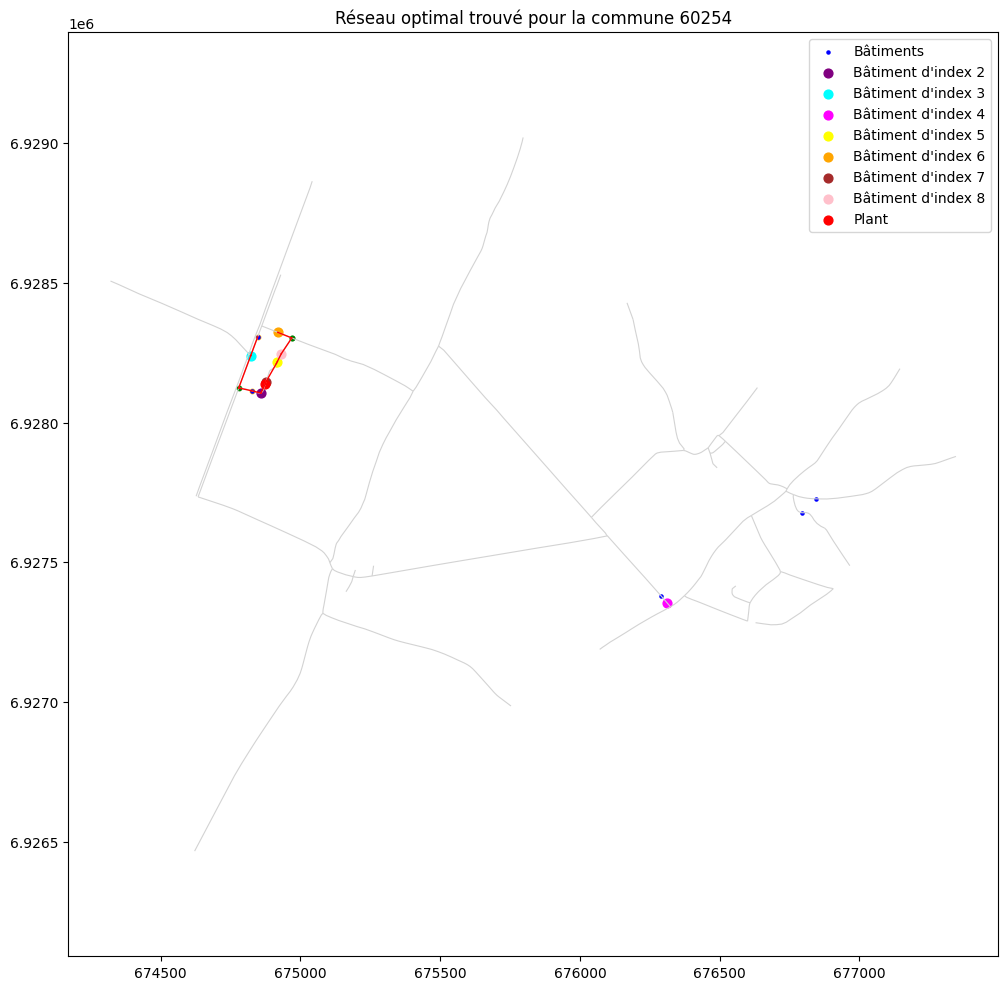

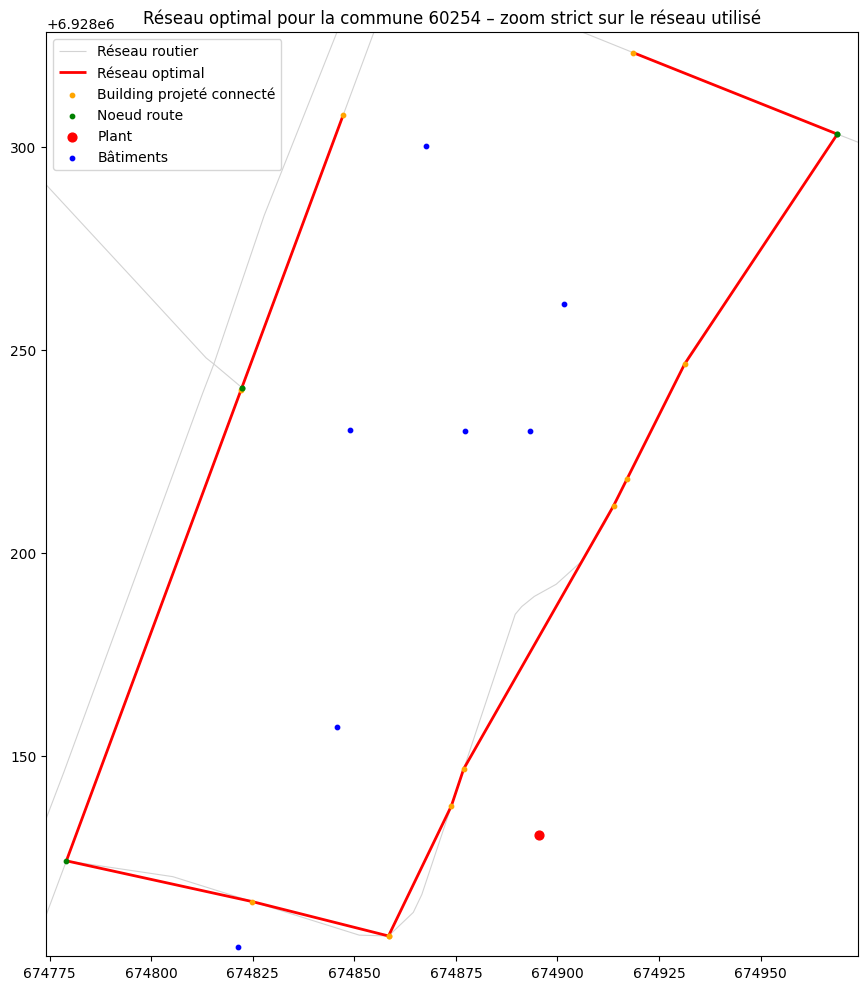

Longueur totale du réseau : 34343.803789932215 m ou via bis : 21041.87476502095 m
Couverture chauffage totale : 56697.0 MWh/an ou via bis : 56697.0 MWh/an


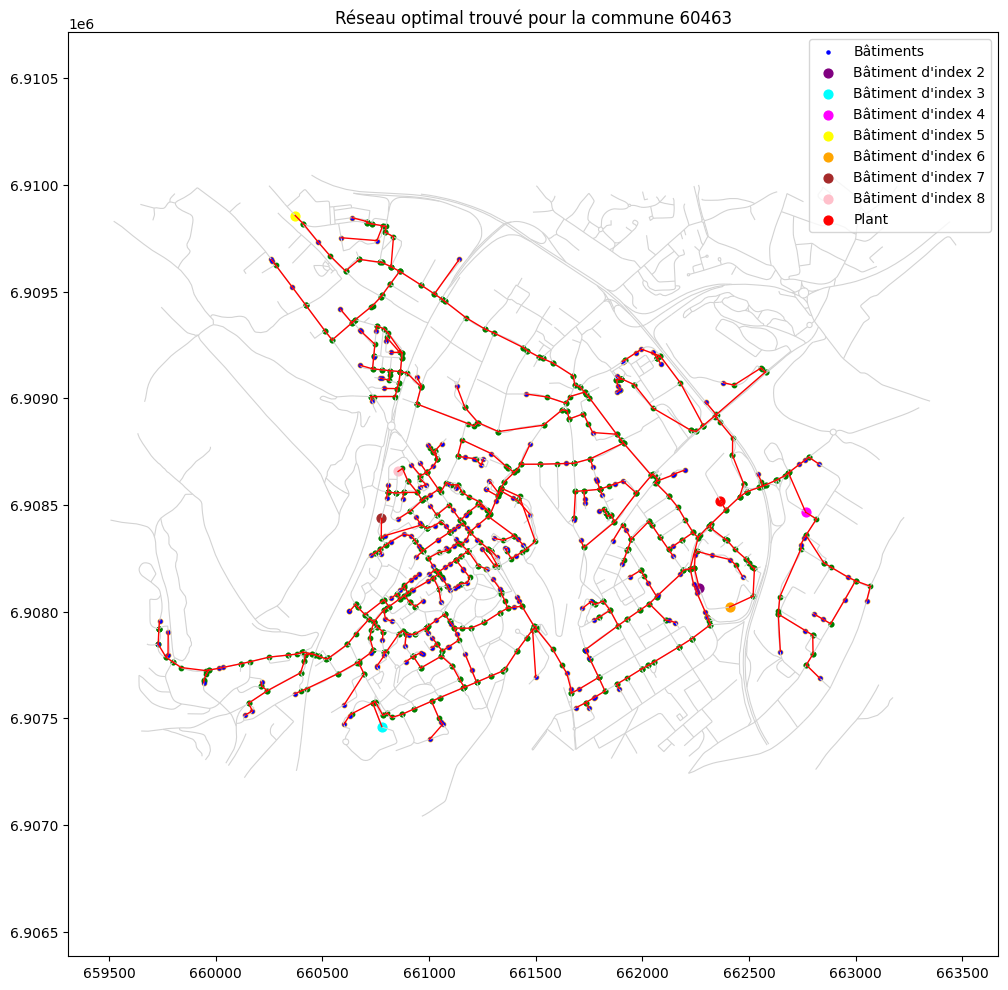

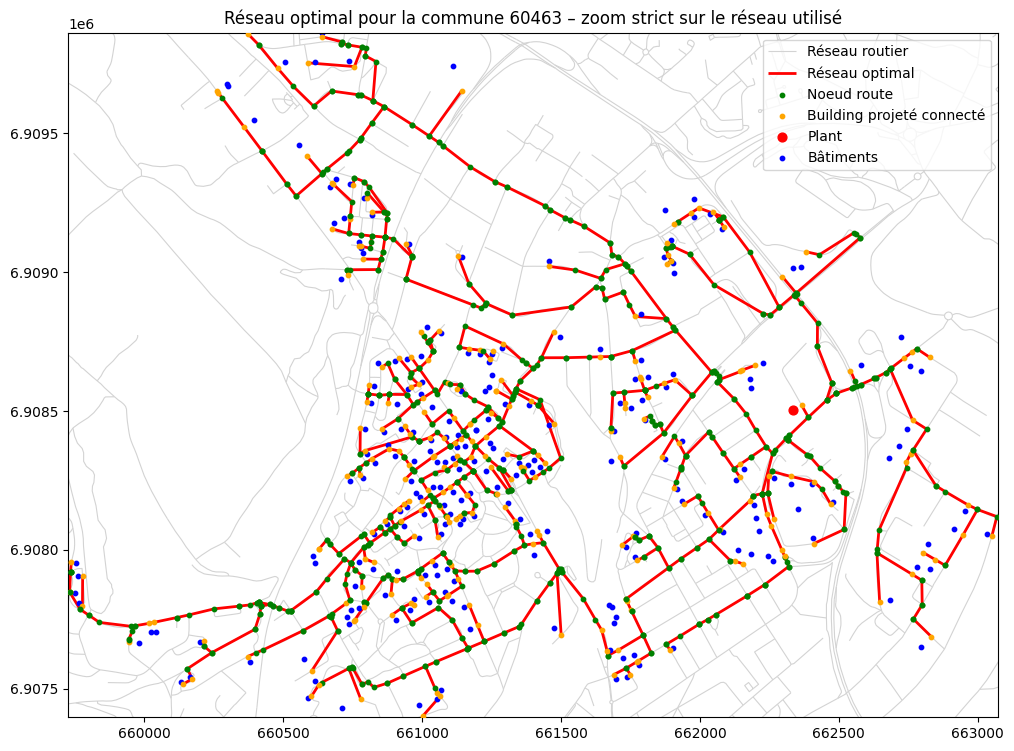

Longueur totale du réseau : 21010.1021606566 m ou via bis : 12665.756582279071 m
Couverture chauffage totale : 38088.0 MWh/an ou via bis : 38088.0 MWh/an


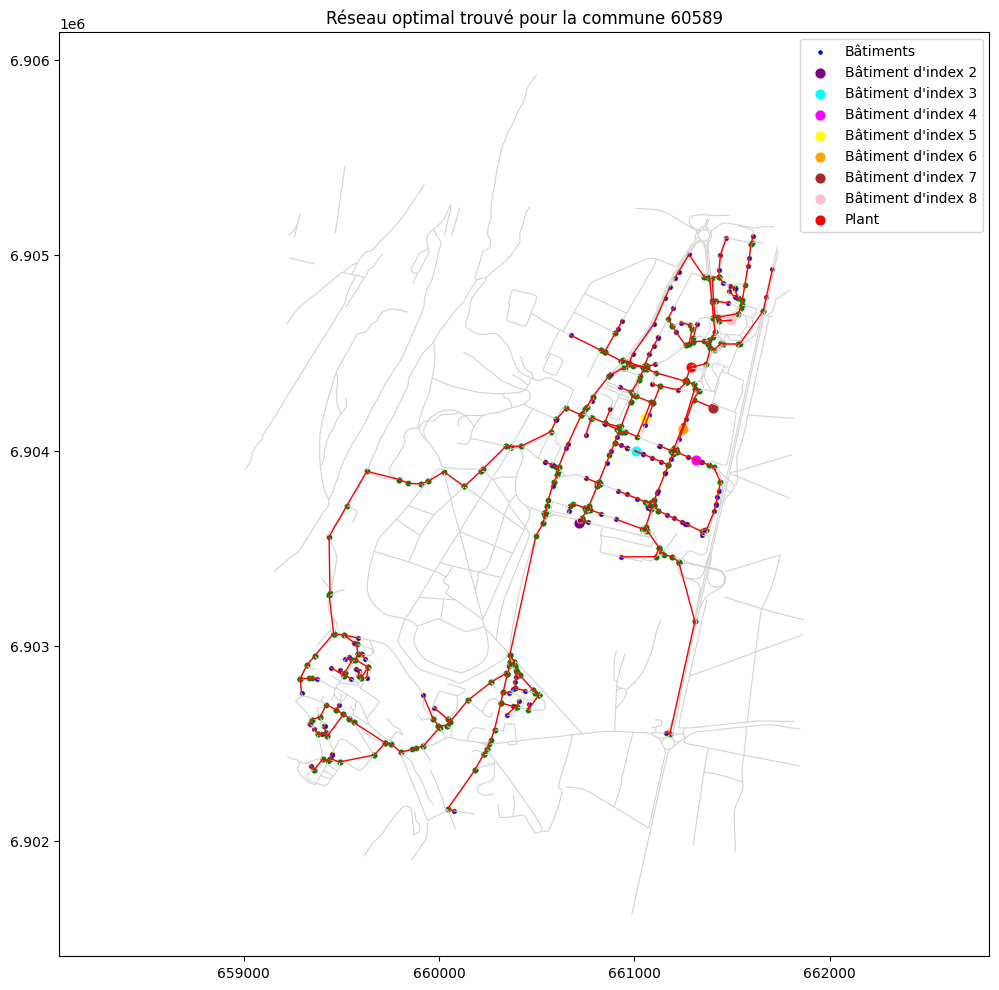

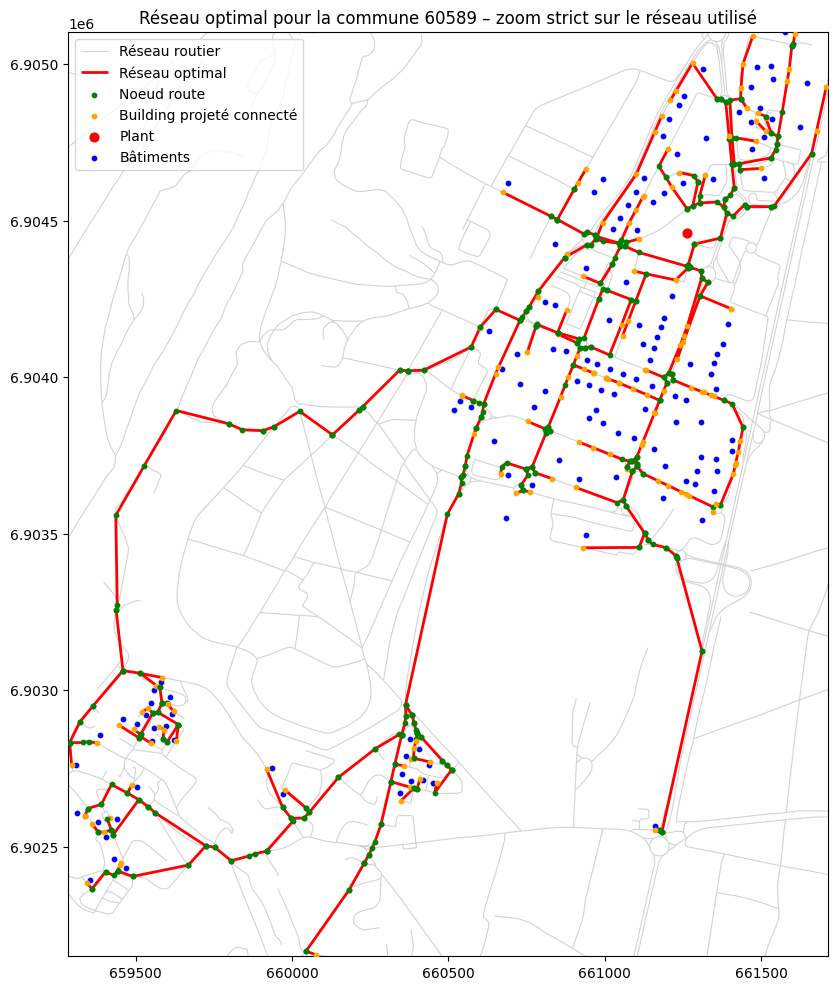

Longueur totale du réseau : 569.038913478712 m ou via bis : 526.8021769125733 m
Couverture chauffage totale : 1950.0 MWh/an ou via bis : 1950.0 MWh/an


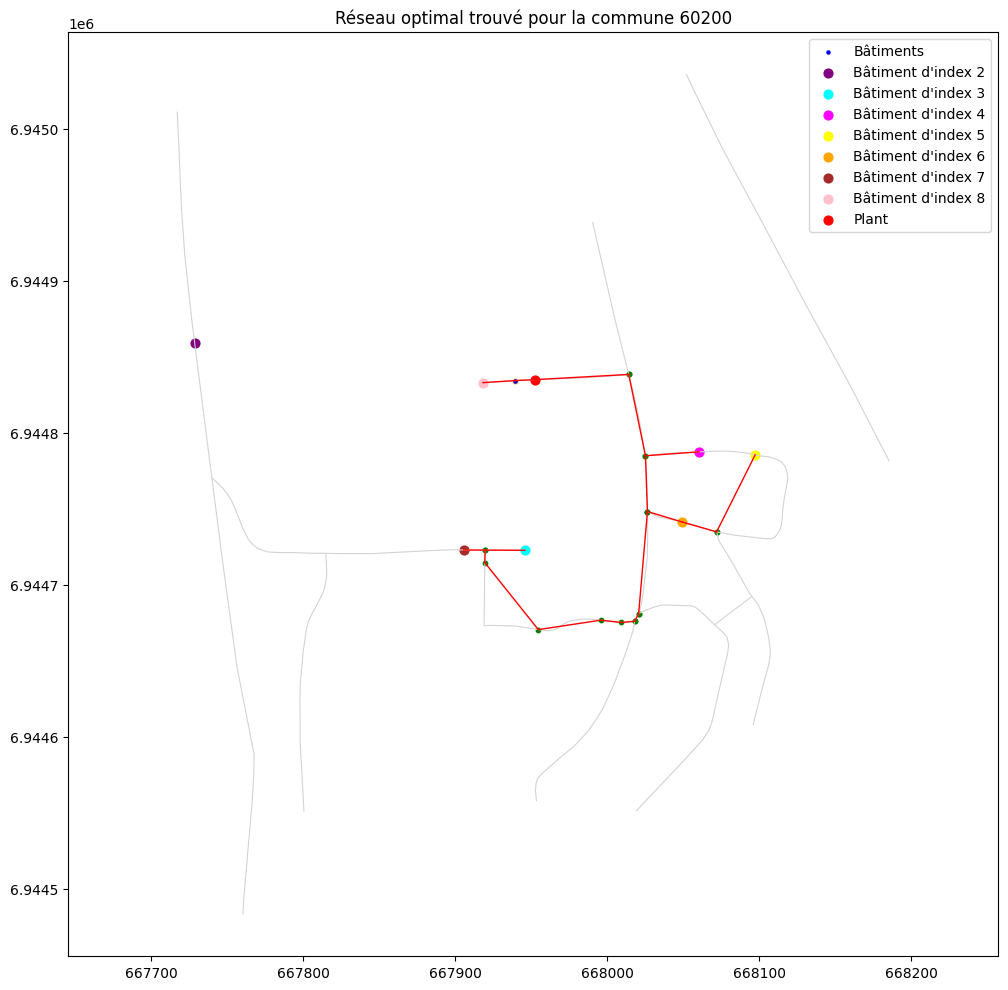

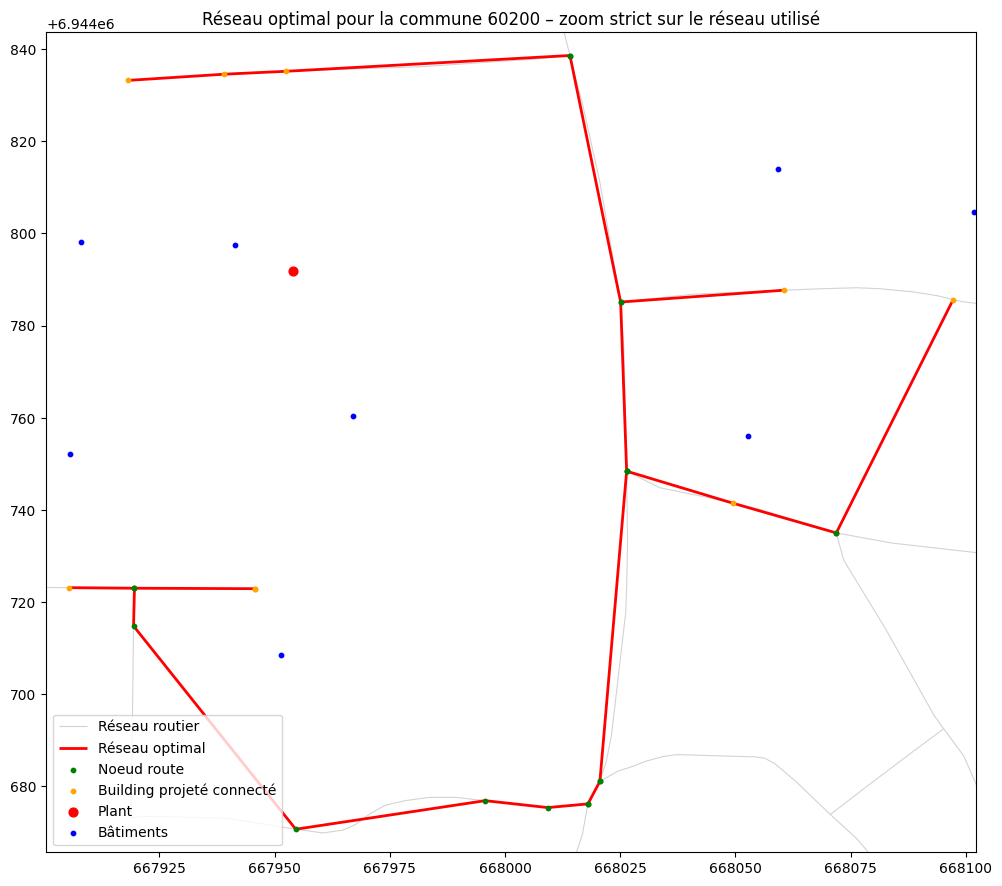

In [ ]:
reseaux_communes = {}

for commune in selected:
    result, nb_buildings, stade, reject_reason=process_commune(
        commune,
        df_selected_roads,
        idx_ip_plant=0

    )

    if result is not None:
        reseaux_communes[commune] = result
        fu.tracer_graphe_optimal(commune, reseaux_communes)
        fu.tracer_graphe_optimal_zoom(commune, reseaux_communes)
    else:
        print(f"Commune rejetée : {reject_reason}")



## Tentative avec optimisation de lambda

In [18]:
LAMBDA_INIT = 0.1
LAMBDA_MAX=1.5
PAS_LAMBDA = 0.1


selected = []
rejected = []
reseaux_communes = {}

a_traiter = liste_communes.copy()
#a_traiter=['60057', '60100', '60175', '60190', '60215', '60223', '60241', '60264', '60276', '60350']

while a_traiter:
    commune = a_traiter.pop(0)

    lambda_commune = LAMBDA_INIT
    result = None
    reason = None
    stade = None
    nb_buildings_actuel = None

    # --- Boucle de retry sur lambda ---
    while lambda_commune <= LAMBDA_MAX:
        result, nb_buildings_actuel, stade, reason = process_commune(
            commune,
            df_selected_roads,
            lambda_commune
        )

        # Succès → on s'arrête
        if result is not None:
            break

        # Si rejet autre que stade 4 → inutile de retenter
        if stade != "4" or nb_buildings_actuel < 40:
            break

        # Sinon on augmente lambda
        lambda_commune += PAS_LAMBDA

    # --- Décision finale ---
    if result is None:
        rejected.append(commune)
        print(
            f"Commune {commune} rejetée "
            f"(stade {stade}, {reason}, "
            f"lambda max testé = {lambda_commune :.1f})"
        )
    else:
        selected.append(commune)
        reseaux_communes[commune] = result
        print(
            f"Commune {commune} éligible "
            f"lambda retenu = {lambda_commune:.1f} | "
            f"{len(result['connected_buildings'])} bâtiments"
        )

    gc.collect()

Commune 60001 rejetée (stade 2, Stade 2 : 4 bâtiments, lambda max testé = 0.1)
Commune 60003 rejetée (stade 2, Stade 2 : 2 bâtiments, lambda max testé = 0.1)
Commune 60006 rejetée (stade 2, Stade 2 : 8 bâtiments, lambda max testé = 0.1)
Commune 60007 rejetée (stade 4, Stade 4 (densité) : 0.33 MWh/m/an, lambda max testé = 0.1)
Commune 60008 rejetée (stade 2, Stade 2 : 7 bâtiments, lambda max testé = 0.1)
Commune 60009 rejetée (stade 4, Stade 4 (densité) : 0.48 MWh/m/an, lambda max testé = 0.1)
Commune 60010 rejetée (stade 2, Stade 2 : 14 bâtiments, lambda max testé = 0.1)
Commune 60011 rejetée (stade 2, Stade 2 : 2 bâtiments, lambda max testé = 0.1)
Commune 60012 rejetée (stade 2, Stade 2 : 11 bâtiments, lambda max testé = 0.1)
Commune 60015 rejetée (stade 2, Stade 2 : 5 bâtiments, lambda max testé = 0.1)
Commune 60021 rejetée (stade 2, Stade 2 : 1 bâtiments, lambda max testé = 0.1)
Commune 60023 rejetée (stade 2, Stade 2 : 1 bâtiments, lambda max testé = 0.1)
Commune 60024 rejetée (sta

Communes sélectionnées : ['60057', '60157', '60175', '60176', '60463', '60589']
Communes rejetées : ['60001', '60003', '60006', '60007', '60008', '60009', '60010', '60011', '60012', '60015', '60021', '60023', '60024', '60025', '60029', '60030', '60032', '60033', '60034', '60039', '60040', '60041', '60042', '60043', '60046', '60047', '60054', '60059', '60065', '60067', '60068', '60070', '60074', '60076', '60077', '60079', '60085', '60086', '60088', '60091', '60093', '60094', '60100', '60102', '60103', '60104', '60106', '60107', '60108', '60115', '60116', '60118', '60119', '60120', '60123', '60129', '60130', '60132', '60133', '60134', '60135', '60138', '60139', '60141', '60142', '60143', '60147', '60149', '60150', '60151', '60154', '60155', '60156', '60159', '60165', '60166', '60167', '60168', '60169', '60172', '60177', '60178', '60184', '60185', '60187', '60188', '60189', '60195', '60196', '60198', '60199', '60206', '60223', '60225', '60229', '60232', '60233', '60234', '60235', '60238',

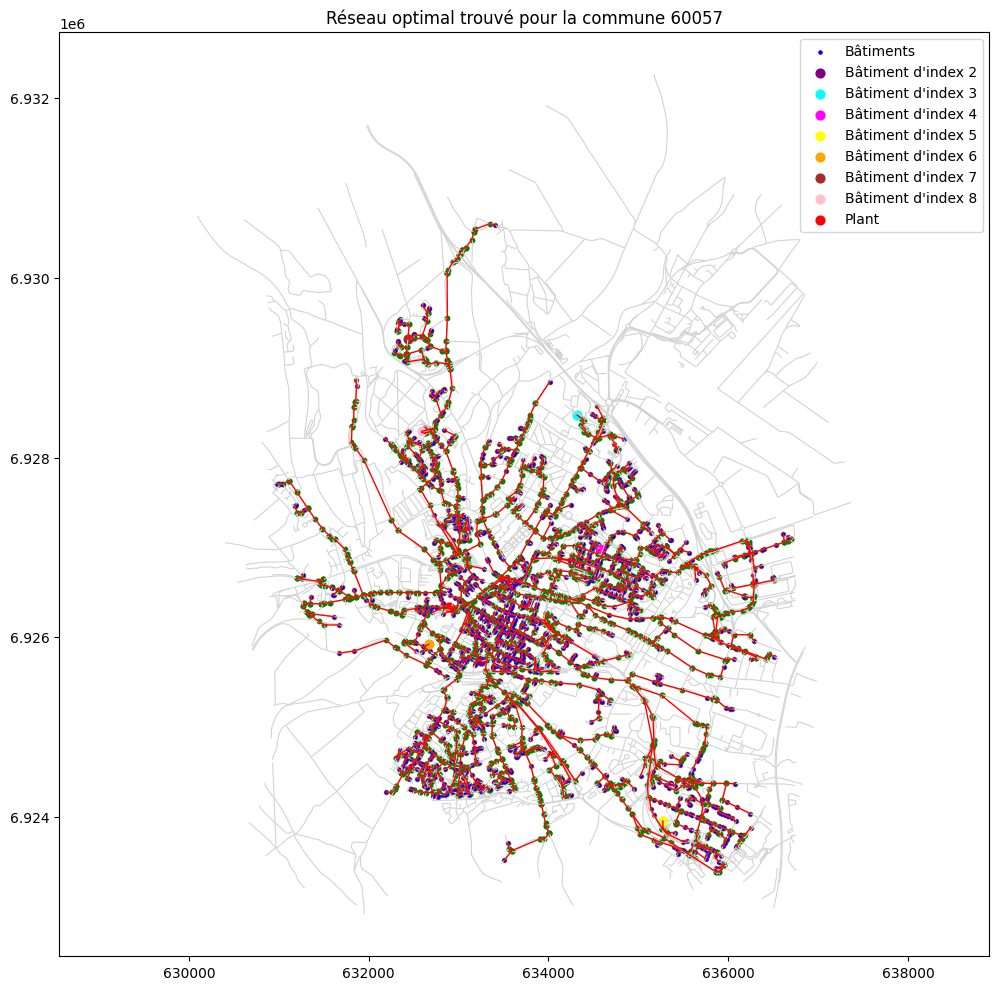

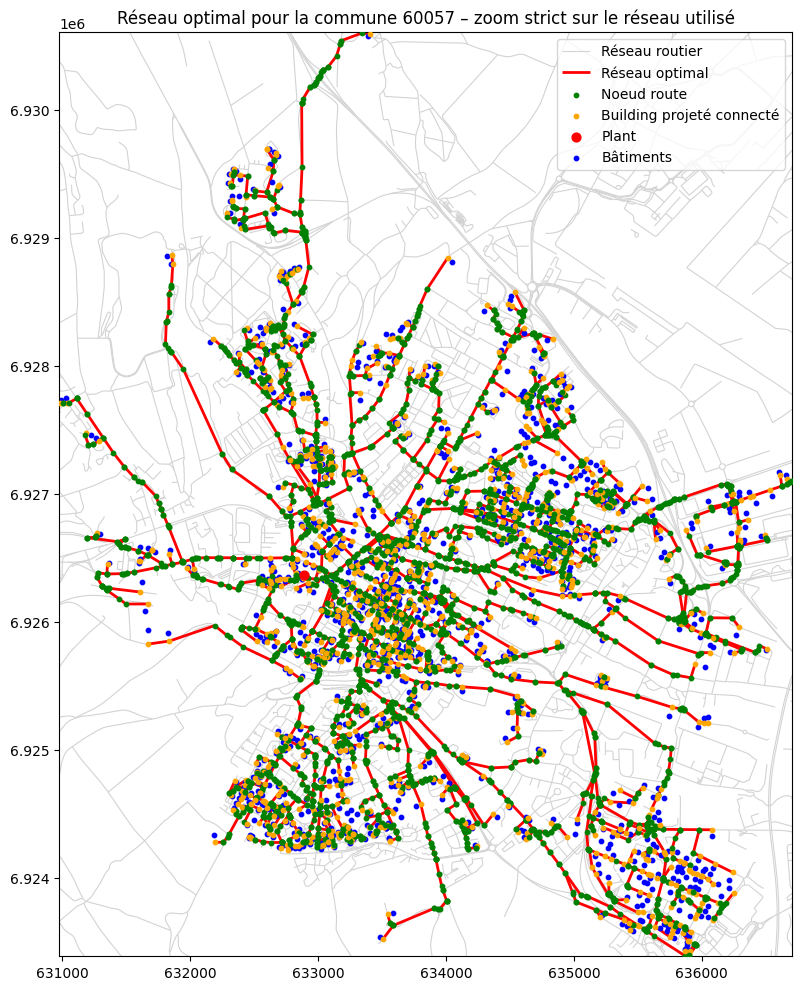

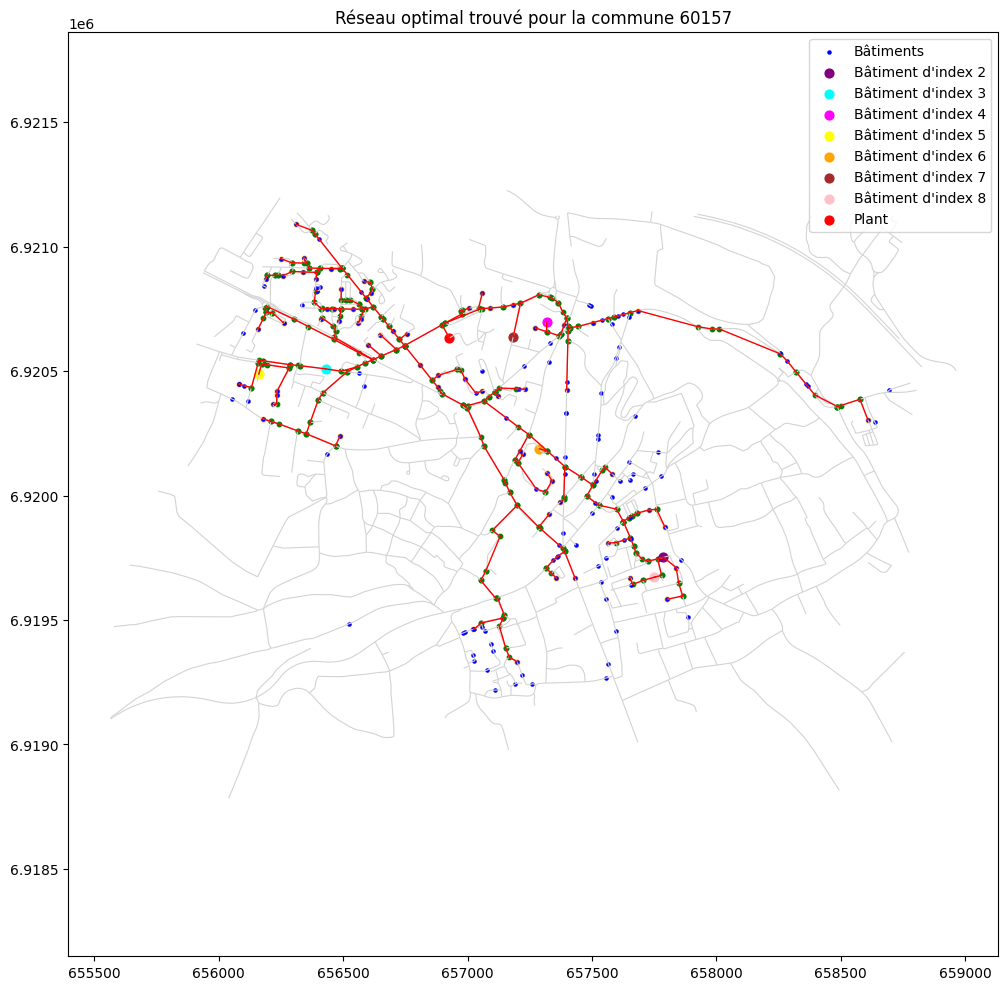

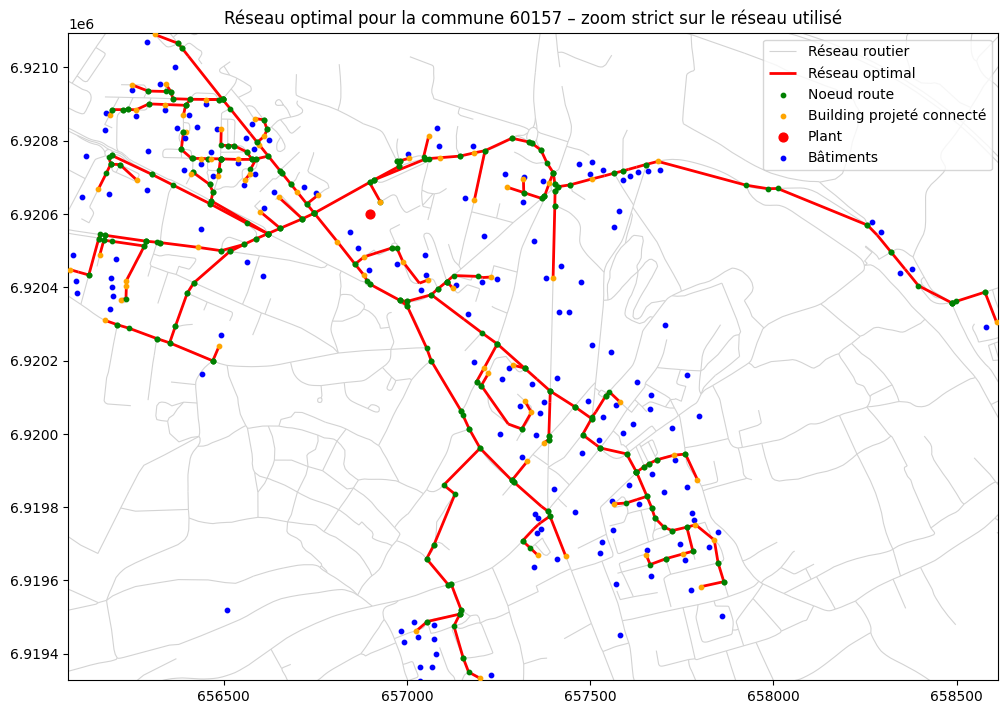

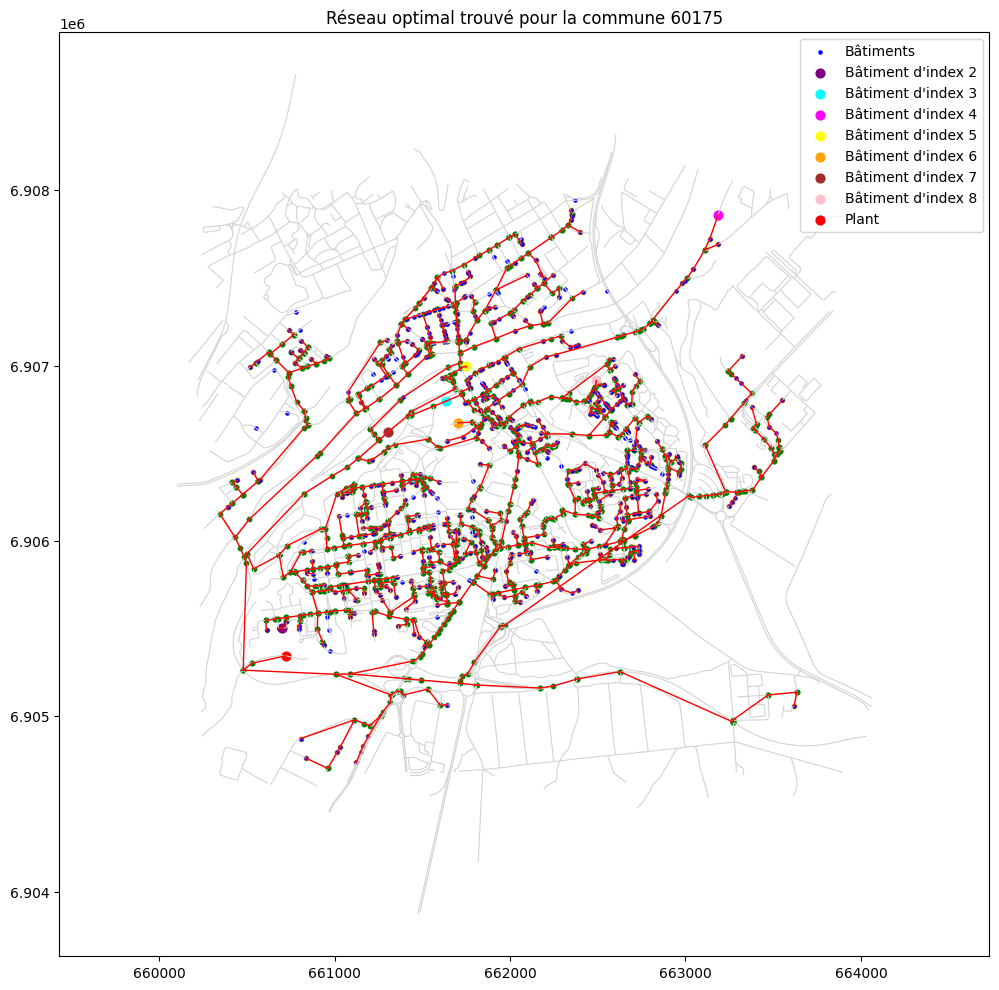

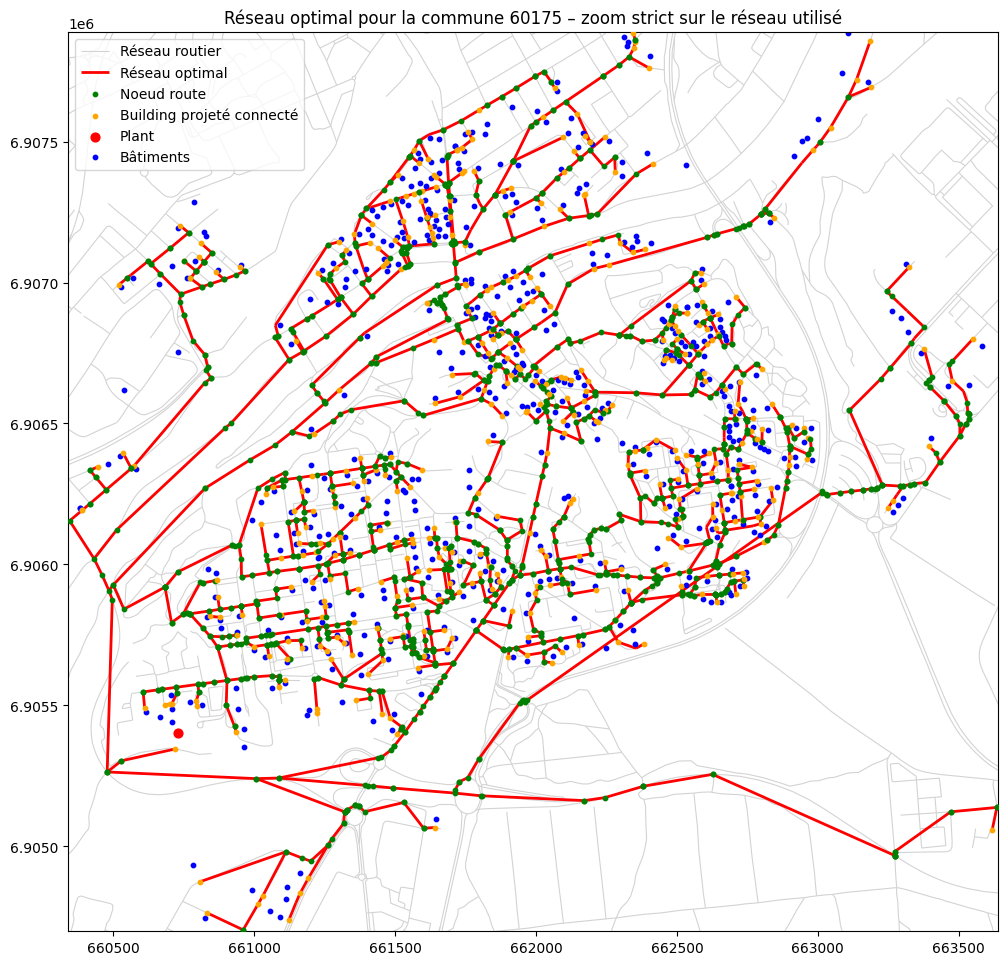

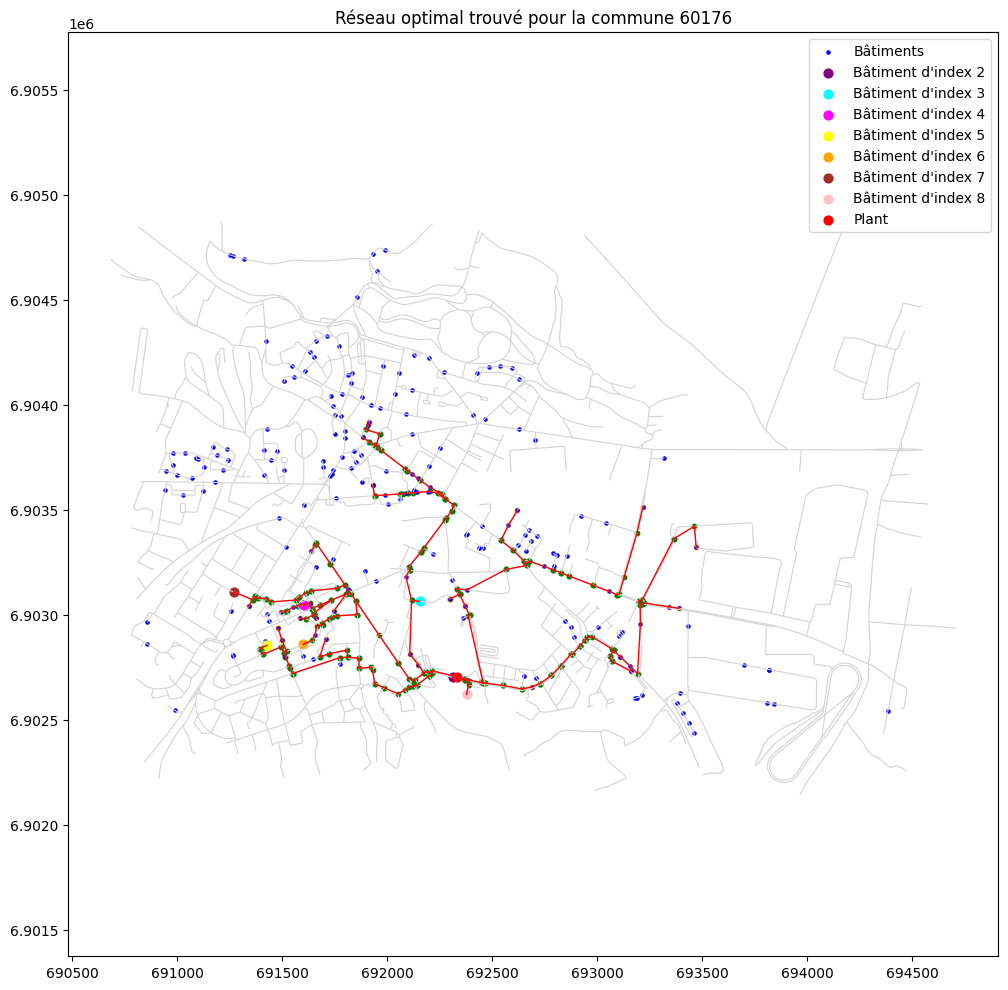

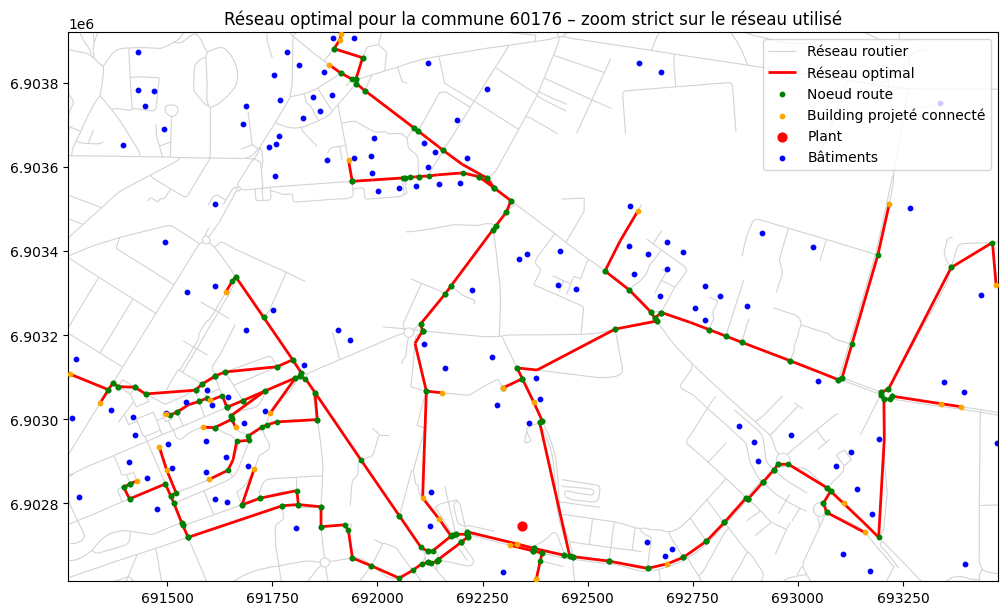

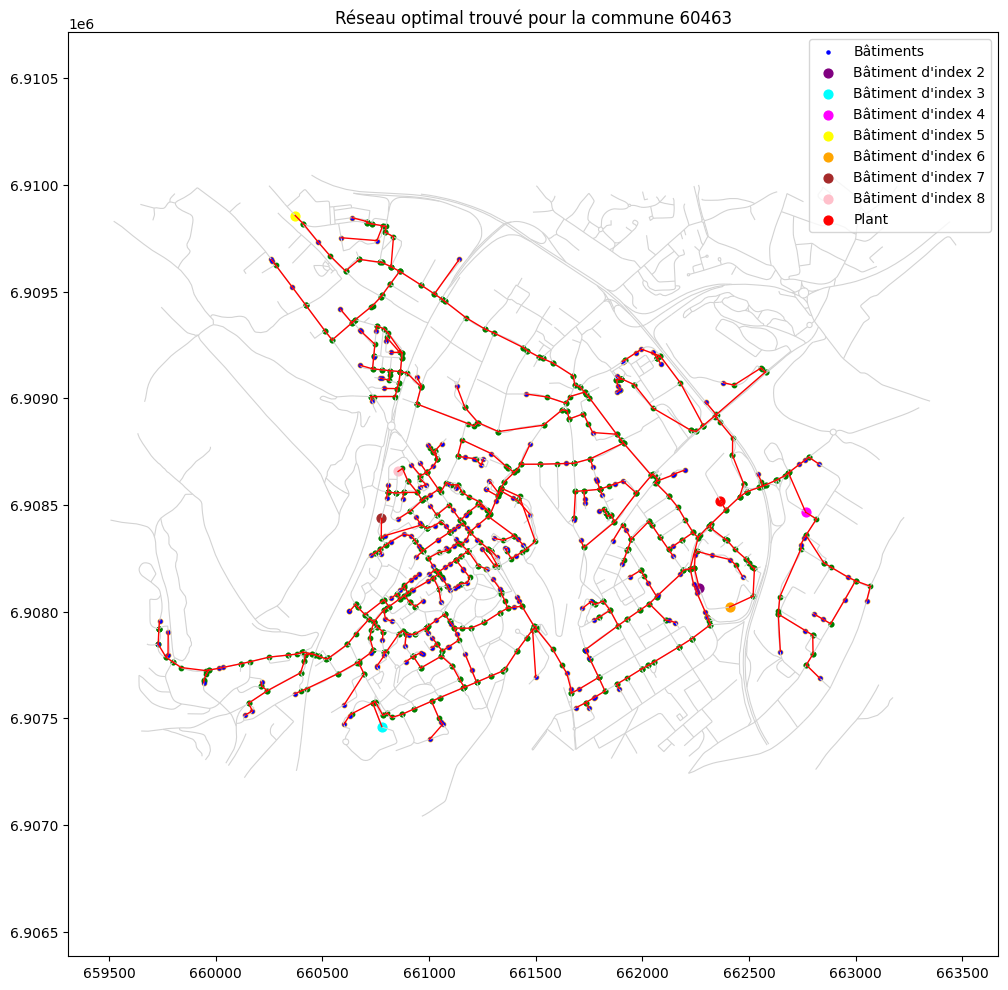

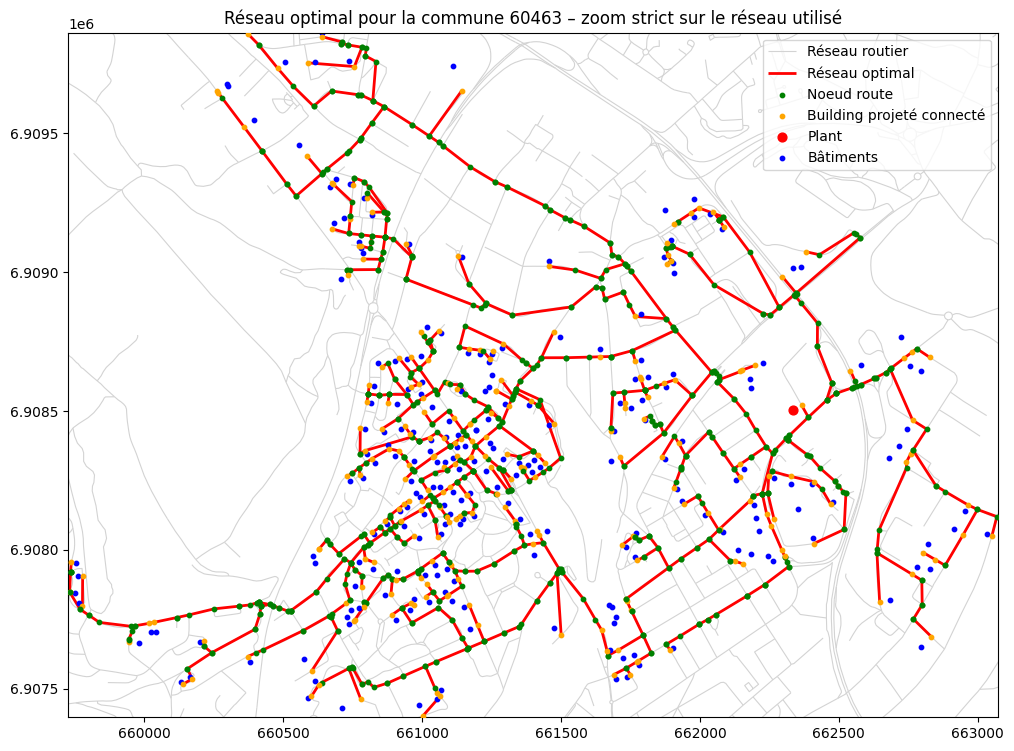

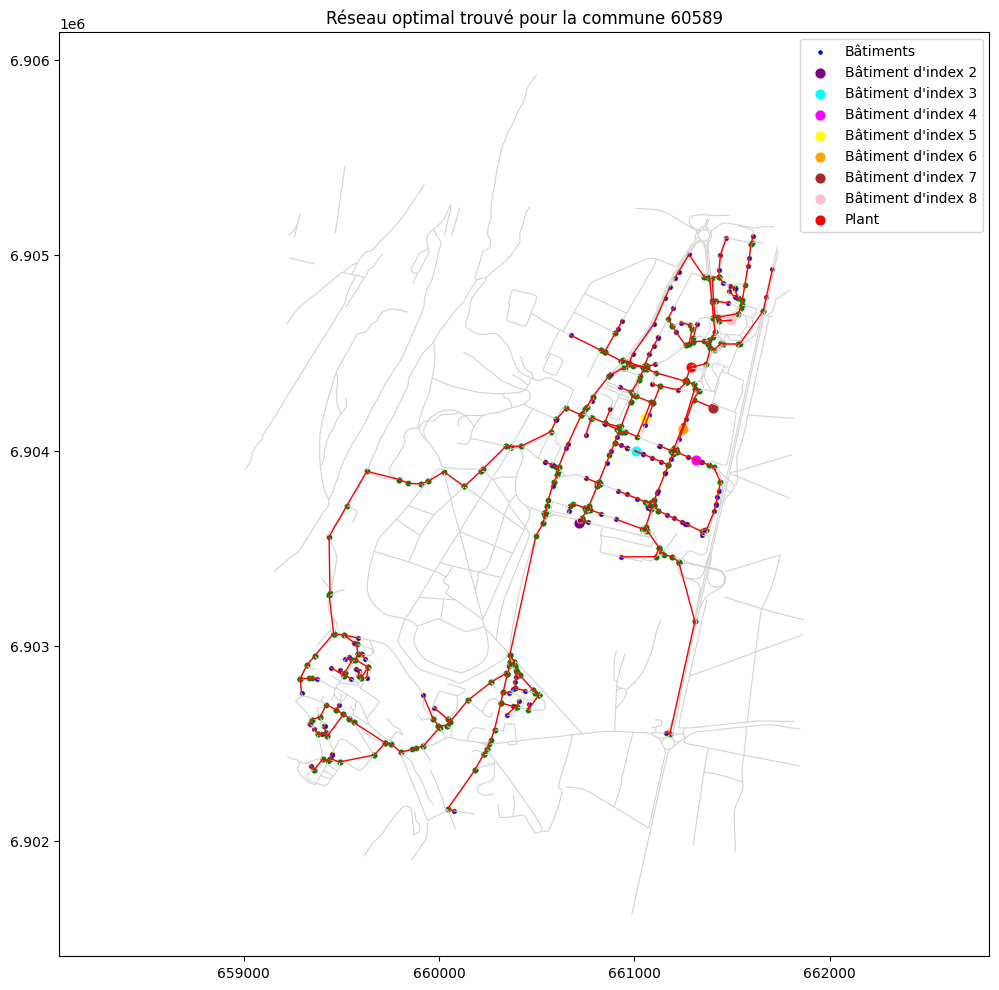

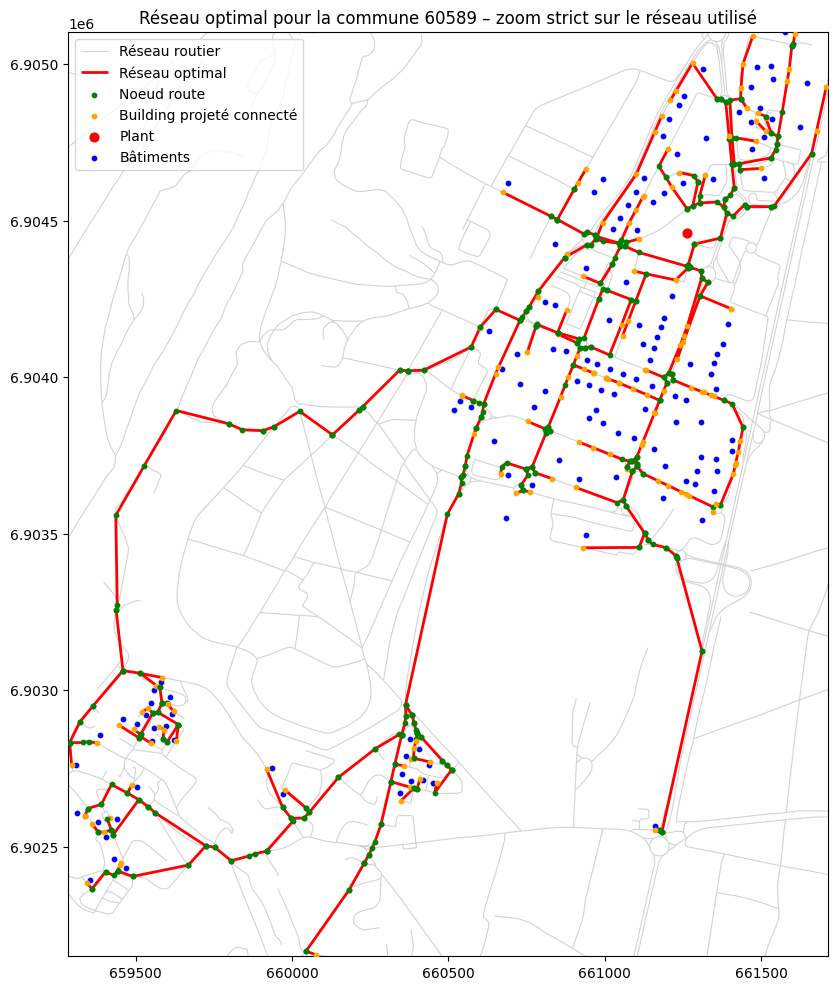

In [ ]:
#Résultats des communes sélectionnées
print(f"Communes sélectionnées : {selected}")
print(f"Communes rejetées : {rejected}")
print(f"Nombre de communes sélectionnées : {len(selected)}")    

#Affichage des résultats de demande en chaleur des communes sélectionnées
for commune in selected:
    total_heating_coverage = reseaux_communes[commune]["total_heating_coverage_MWh_per_year"]
    total_length_km = reseaux_communes[commune]["total_length_km"]
    heating_density = total_heating_coverage / (total_length_km * 1000)  # MWh/m/an
    print(
        f"Commune {commune} : "
        f"Demande totale en chaleur = {total_heating_coverage/1e3:.2f} GWh/an, "
        f"Longueur totale du réseau = {total_length_km:.2f} km, "
        f"Densité de demande = {heating_density:.2f} MWh/m/an"
    )

    
#Affichage des réseaux des communes sélectionnées
for commune in selected:
    fu.tracer_graphe_optimal(commune, reseaux_communes)
    fu.tracer_graphe_optimal_zoom(commune, reseaux_communes)    
